In [11]:
#a. Import required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

In [28]:
#b. Upload / access the dataset
dataset = pd.read_csv("creditcard.csv")
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [12]:
# Preprocess the data (if needed)
# Normalize the data to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X = scaler.fit_transform(dataset.drop("Class", axis=1))
y = dataset["Class"]

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Build and train the Autoencoder model
input_dim = X_train.shape[1]

In [15]:
#c. Encoder converts it into latent representation

In [17]:
# Encoder
encoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu')
])

In [ ]:
#d. Decoder networks convert it back to the original input

In [18]:
# Decoder
decoder = models.Sequential([
    layers.Input(shape=(16,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(input_dim, activation='linear')  # Using 'linear' activation for reconstruction
])

# Autoencoder
autoencoder = models.Sequential([
    encoder,
    decoder
])

In [ ]:
#e . Compile the models with Optimizer, Loss, and Evaluation Metrics

In [19]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, shuffle=True, validation_data=(X_test, X_test))


Epoch 1/10

7121/7121 [==============================] - 30s 4ms/step - loss: 0.3291 - val_loss: 0.1998
Epoch 2/10
7121/7121 [==============================] - 26s 4ms/step - loss: 0.1791 - val_loss: 0.1571
Epoch 3/10
7121/7121 [==============================] - 26s 4ms/step - loss: 0.1481 - val_loss: 0.1341
Epoch 4/10
7121/7121 [==============================] - 26s 4ms/step - loss: 0.1343 - val_loss: 0.1429
Epoch 5/10
7121/7121 [==============================] - 28s 4ms/step - loss: 0.1165 - val_loss: 0.1063
Epoch 6/10
7121/7121 [==============================] - 27s 4ms/step - loss: 0.1082 - val_loss: 0.0998
Epoch 7/10
7121/7121 [==============================] - 26s 4ms/step - loss: 0.1039 - val_loss: 0.0931
Epoch 8/10
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0977 - val_loss: 0.1059
Epoch 9/10
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0937 - val_loss: 0.1010
Epoch 10/10
7121/7121 [==============================] - 26s 4ms/step -

In [20]:
# Detect anomalies and tune the threshold
y_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - y_pred, 2), axis=1)

1781/1781 [==============================] - 5s 2ms/step


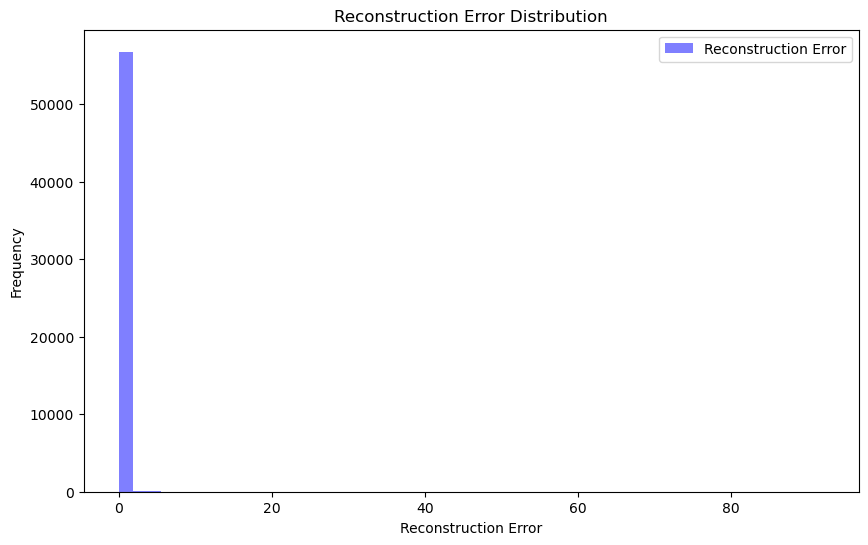

In [21]:
# Visualize the reconstruction error distribution
plt.figure(figsize=(10, 6))
plt.hist(mse, bins=50, alpha=0.5, color='b', label='Reconstruction Error')
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.title("Reconstruction Error Distribution")
plt.show()

In [22]:
# Threshold tuning (iterate and adjust as needed)
thresholds = np.arange(0.1, 1.0, 0.1)  # Adjust the step size as needed

for threshold in thresholds:
    anomalies = mse > threshold


In [30]:
# Count the number of anomalies
num_anomalies = np.sum(anomalies)
print(f"Threshold: {threshold:.1f}, Number of anomalies: {num_anomalies}")

Threshold: 0.9, Number of anomalies: 558


In [24]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, anomalies))

print("\nClassification Report:")
print(classification_report(y_test, anomalies))

Confusion Matrix:
[[56351   513]
 [   53    45]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.08      0.46      0.14        98

    accuracy                           0.99     56962
   macro avg       0.54      0.73      0.57     56962
weighted avg       1.00      0.99      0.99     56962



In [25]:
import seaborn as sns

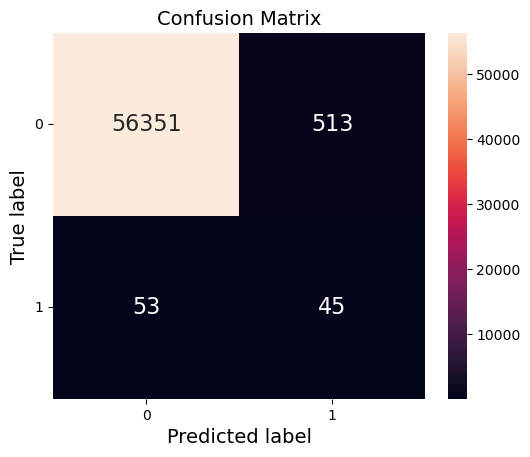

In [26]:
plt.figure(figsize = (6, 4.75))
sns.heatmap(confusion_matrix(y_test, anomalies), annot = True, annot_kws = {"size": 16}, fmt = 'd')
plt.xticks([0.5, 1.5],  rotation = 'horizontal')
plt.yticks([0.5, 1.5],  rotation = 'horizontal')
plt.xlabel("Predicted label", fontsize = 14)
plt.ylabel("True label", fontsize = 14)
plt.title("Confusion Matrix", fontsize = 14)
plt.grid(False)
plt.show()